In [1]:
import oommfpy as op
import numpy as np
import matplotlib.pyplot as plt

## Basic functionality

The most useful method in this library is the `OOMMFData` class, which can read a `omf` file in any format (binary, structured, etc.). From this class, the magnetisation and coordinates can be computed:

In [2]:
data = op.OOMMFData('../../test/omfs/isolated_sk_Cnv_n_060-Oxs_MinDriver-Magnetization-00-0000498.omf')
data.generate_m()
data.generate_coordinates()

After reading the coordinates we have the `data.x`, `data.y` and `data.z` arrays with the coordinates. Unique values are stored in the `xs`, `ys` and `zs` arrays:

In [3]:
data.xs

array([ 0.125,  0.375,  0.625,  0.875,  1.125,  1.375,  1.625,  1.875,
        2.125,  2.375,  2.625,  2.875,  3.125,  3.375,  3.625,  3.875,
        4.125,  4.375,  4.625,  4.875,  5.125,  5.375,  5.625,  5.875,
        6.125,  6.375,  6.625,  6.875,  7.125,  7.375,  7.625,  7.875,
        8.125,  8.375,  8.625,  8.875,  9.125,  9.375,  9.625,  9.875,
       10.125, 10.375, 10.625, 10.875, 11.125, 11.375, 11.625, 11.875,
       12.125, 12.375, 12.625, 12.875, 13.125, 13.375, 13.625, 13.875,
       14.125, 14.375, 14.625, 14.875])

Similarly for the magnetisation, where the field (spin orientations) is stored in the `(n,3)`-array `data.m` and the magnetisation magnitude at every mesh site is stored in `data.Ms`:

In [4]:
data.mx

array([-6.42060825e-06, -1.94469782e-05, -3.30261535e-05, ...,
        3.30261535e-05,  1.94469782e-05,  6.42060825e-06])

We can compute the skyrmion number for a given plane and slice:

In [5]:
data.compute_sk_number(plane='xy', index=0)

-0.9785538895386998

The index means computing the slice at `z=`:

In [6]:
data.zs[0]

1.0

We can use this information to generate a plot:

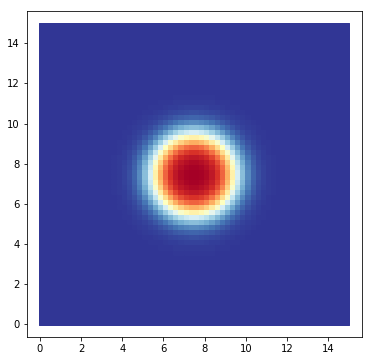

In [7]:
fltr = np.logical_and(data.z == data.zs[0],
                      data.Ms > 1e-4)

f = plt.figure(figsize=(6, 6))
# More effective to use imshow to avoid scaling the
# scattered data point size
plt.scatter(data.x[fltr], data.y[fltr],
            c=data.mz[fltr],
            cmap='RdYlBu',
            marker='s'
            )
plt.show()

## Plot Functions

The library also offers plot tools that can be used to quickly analyse a system:

In [7]:
from oommfpy.tools import plot_omf
from oommfpy.tools.plot_omf import plot_charge_density

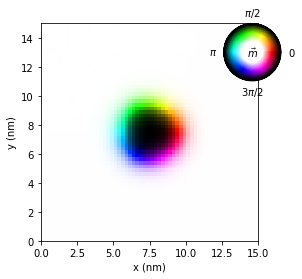

In [6]:
plot_omf('../../test/omfs/isolated_sk_Cnv_n_060-Oxs_MinDriver-Magnetization-00-0000498.omf',
         cbar_offsets=[-0.25, -0.2])

And the charge density:

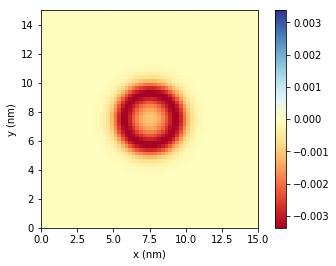

In [9]:
plot_charge_density('../../test/omfs/isolated_sk_Cnv_n_060-Oxs_MinDriver-Magnetization-00-0000498.omf',
                    plane='xy', index=0)